In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import preprocessing

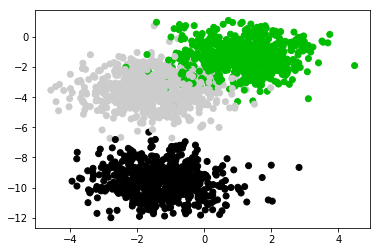

In [2]:
n_samples=2000
centers=3
x,y = make_blobs(n_samples=n_samples, centers=centers,random_state=2)
plt.figure()
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.spectral)
plt.show()

In [3]:
nn_input_dim = 2
nn_hid_layer = 5
nn_output_dim = 3
enc=preprocessing.OneHotEncoder()
enc.fit(y.reshape((-1,1)))
y1 = enc.transform((y.reshape((-1,1)))).toarray() 
y1[1]

array([ 0.,  0.,  1.])

In [4]:
def activation_logist(x,dev=False):
    if dev==True:
        return x*(1-x)
    return 1/(1+np.exp(-x))

In [5]:
def activation_softmax(x,dev=False):
#     print(x.shape)
#     print(x.max(axis=1).shape)
    x_shift= x-x.max(axis=1).reshape(-1,1)
    x_output = np.exp(x_shift)/np.sum(np.exp(x_shift),axis=1,keepdims=True)
    return x_output

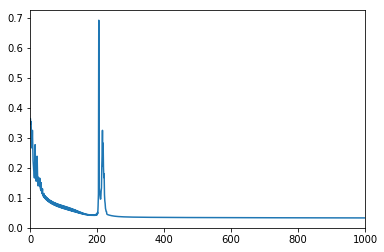

In [6]:
loop = 1000
epsilon = 0.001
W1 = np.random.randn(nn_input_dim,nn_hid_layer) / np.sqrt(nn_input_dim )
b1 = np.zeros((1,nn_hid_layer))
W2 = np.random.randn(nn_hid_layer,nn_output_dim ) / np.sqrt(nn_hid_layer)
b2 = np.zeros((1,nn_output_dim))
J=pd.Series(np.arange(loop,dtype='float32'))
for i in range(loop):
    Z1 = x.dot(W1)+b1
    A1 = activation_logist(Z1)
    Z2 = A1.dot(W2)+b2
    A2 = activation_softmax(Z2)
    
    dZ2 = A2 - y1
    dW2 = (A1.T).dot(dZ2)
    db2 = np.sum(dZ2,axis=0,keepdims=True)
    dZ1 = dZ2.dot(W2.T)*activation_logist(A1,True)
    dW1 = np.dot(x.T,dZ1)
    db1 = np.sum(dZ1,axis=0)
    
    W1 +=  -epsilon*dW1
    W2 +=  -epsilon*dW2
    b1 +=  -epsilon*db1
    b2 +=  -epsilon*db2
    J[i]=-(1/n_samples)*(1/nn_output_dim)*np.sum(np.diag(y1.dot(np.log(A2).T)))
plt.figure()
J.plot()
plt.show()

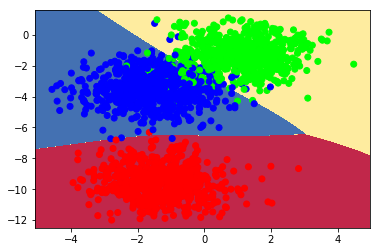

In [7]:
def pred_func(x):
    Z1 = x.dot(W1)+b1
    A1 = activation_logist(Z1)
    Z2 = A1.dot(W2)+b2
    A2 = activation_softmax(Z2)
    y_hat = np.argmax(A2,axis=1)
#     print(A2)
    return y_hat
x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,cmap=plt.cm.Spectral)
plt.scatter(x[:, 0], x[:, 1], c=y1,cmap=plt.cm.Spectral)
plt.show()